In [1]:
import matplotlib.pyplot as plt
import cv2

In [257]:
# поиск по ключевым точкам, получить peak coord

def matchTemplate(path_img, path_pattern):

    # Load the input images
    input_image = cv2.imread(path_img)
    pattern_template = cv2.imread(path_pattern)

    # тут тодлжен быть свой код
    # необходимо найти ключевые точки и вывести координаты рамки
    sift = cv2.xfeatures2d.SIFT_create()
    kp1, des1 = sift.detectAndCompute(input_image, None) 
    kp2, des2 = sift.detectAndCompute(pattern_template, None) 
    
    bf = cv2.BFMatcher(cv2.NORM_L1,crossCheck=True) 
    #crossCheck=false - совпадения вида один ко многим, crossCheck=true - совпадения вида один к одному
    matches = bf.match(des1,des2)
    matches = sorted(matches, key = lambda x:x.distance) 
    
    points = []
    for m in matches[:15]:
        points.append(kp1[m.queryIdx].pt)
    

    #height, width =  input_image.shape
    highlight_start = (int(min(points, key=lambda x: x[0])[0]), 
                       int(min(points, key=lambda x: x[1])[1]))
    highlight_end = (int(max(points, key=lambda x: x[0])[0]), 
                     int(max(points, key=lambda x: x[1])[1]))
    return highlight_start, highlight_end


In [214]:
def show(input_image, pattern_template, highlight_start, highlight_end,row):
    cv2.rectangle(input_image,(row["x1"],row["y1"]), (row["x2"],row["y2"]), 255, 2)
    cv2.rectangle(input_image, highlight_start, highlight_end, 255, 2)
    # Visualize the pattern template and resulting image
    fig_instance, axes_arr = plt.subplots(1, 2, figsize=(10, 5))

    # Show the pattern template
    axes_arr[0].imshow(pattern_template, cmap='gray')
    axes_arr[0].set_title('Pattern Template')

    # Show the input image with the highlighted match
    axes_arr[1].imshow(input_image, cmap='gray')
    axes_arr[1].set_title('Pattern Highlighted')

    plt.show()

In [229]:
# iou
def iou(row, highlight_start, highlight_end):
    true_points_set = set()
    pred_points_set= set()

    for x in range(row["x1"], row["x2"]):
        for y in range(row["y1"], row["y2"]):
            true_points_set.add((x,y))

    for x in range(highlight_start[0],highlight_end[0]):
        for y in range(highlight_start[1], highlight_end[1]):
            pred_points_set.add((x,y))
    
    iou_metric = len(true_points_set.intersection(pred_points_set)) / len(true_points_set.union(pred_points_set))
    
    return iou_metric

In [258]:
# загрузка изображений, перебор
import statistics
from PIL import Image, ImageFilter
import numpy as np
import pandas as pd
dataset = pd.read_csv('dataset/annotation.csv', delimiter=';')
dataset.head()
iou_array=[]
for i in range(0,36):
    row = dataset.iloc[i]
    highlight_start, highlight_end = matchTemplate(f"dataset/{row['id']}.jpg", f"dataset/pattern/cropped_img_{row['id']}.jpg")
    iou_metric = iou(row, highlight_start, highlight_end)
    print(iou_metric)
    iou_array.append(iou_metric)

iou_mean = statistics.mean(iou_array)
print("iou_mean",iou_mean)

0.36388221153846156
0.6054709014136221
0.48146666666666665
0.07731841886478724
0.6970792677661687
0.13728774005792962
0.4669693110389877
0.33443800055233364
0.04733074067526958
0.422792417938049
0.4196423882025455
0.08662221837388519
0.5598742509243911
0.45454851487370534
0.41761363636363635
0.25201612903225806
0.6511993603411513
0.18423534633415628
0.6643382352941176
0.4963457595036542
0.18113187625382748
0.07217998924978883
0.3756533101045296
0.5683399392814977
0.49157303370786515
0.29986962190352023
0.3055833438415087
0.5036637931034482
0.5059744797678845
0.27044639947865756
0.45050490684113215
0.745954644776472
0.03611640260806269
0.45874219446922393
0.30530561588582067
0.022283064347097044
iou_mean 0.3726053925382254


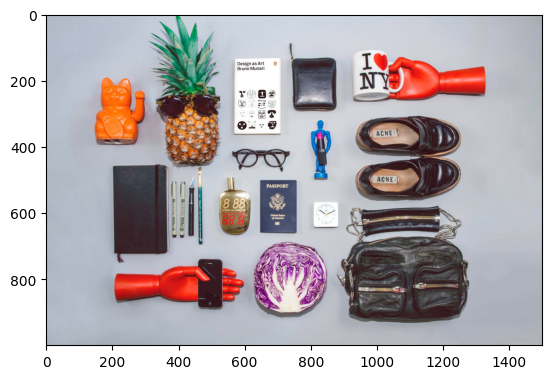

In [240]:
img1 = cv2.imread("dataset/4.jpg")
#plt.axis('off')
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))

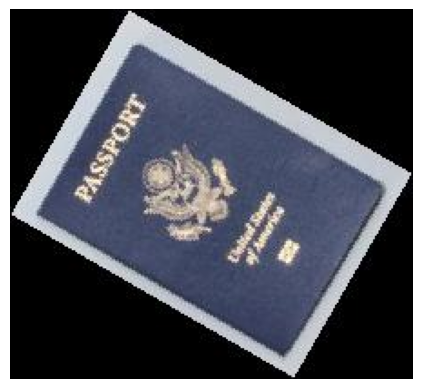

In [241]:
img2 = cv2.imread("dataset/pattern/cropped_img_4.jpg")
plt.axis('off')
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

In [242]:
sift = cv2.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1, None) 
kp2, des2 = sift.detectAndCompute(img2, None) 

In [243]:
bf = cv2.BFMatcher(cv2.NORM_L1,crossCheck=True) 
#crossCheck=false - совпадения вида один ко многим, crossCheck=true - совпадения вида один к одному
matches = bf.match(des1,des2)

In [244]:
matches = sorted(matches, key = lambda x:x.distance) 
print('Количество совпадений ', len(matches))
for i in range(0,3): #выведем первые 3 
  print('Расстояние ',matches[i].distance,'Индекс 1 ',matches[i].trainIdx,'Индекс 2 ', matches[i].queryIdx)

Количество совпадений  121
Расстояние  119.0 Индекс 1  101 Индекс 2  2450
Расстояние  132.0 Индекс 1  146 Индекс 2  2571
Расстояние  194.0 Индекс 1  160 Индекс 2  2396


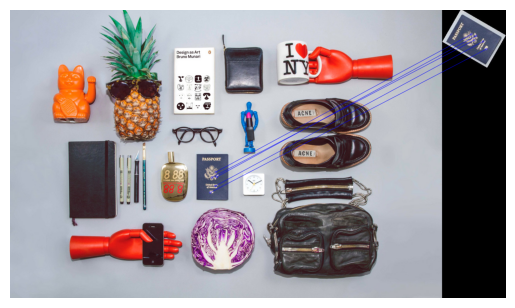

In [245]:
matching_result = cv2.drawMatches(img1, kp1, img2, kp2, matches[:5], None, [255,0,0], flags=2)
#mpl.rcParams['figure.dpi'] = 200
plt.axis('off')
plt.imshow(cv2.cvtColor(matching_result, cv2.COLOR_BGR2RGB))

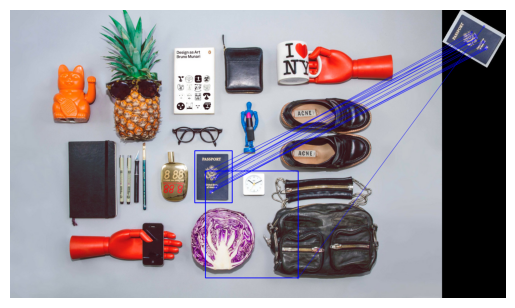

In [252]:
matching_result = cv2.drawMatches(img1, kp1, img2, kp2, matches[:15], None,[255,0,0], flags=2)
plt.axis('off')
plt.imshow(cv2.cvtColor(matching_result, cv2.COLOR_BGR2RGB))

In [247]:
points = []
for m in matches[:15]:
    points.append(kp1[m.queryIdx].pt)
    
print(points)

[(700.413330078125, 582.6714477539062), (712.6494140625, 611.8265991210938), (694.9700927734375, 634.6510009765625), (713.8826293945312, 563.976318359375), (717.0432739257812, 580.5407104492188), (721.1365356445312, 560.9725952148438), (695.0653076171875, 629.9962158203125), (719.7590942382812, 576.7418212890625), (694.9700927734375, 634.6510009765625), (712.5138549804688, 587.5606689453125), (711.114013671875, 617.0222778320312), (703.8631591796875, 630.019775390625), (707.40771484375, 597.5137939453125), (678.4686279296875, 563.364990234375), (1000.1082763671875, 930.1253662109375)]


In [248]:
min(points, key=lambda x: x[1])

(721.1365356445312, 560.9725952148438)

In [249]:
highlight_start = (int(min(points, key=lambda x: x[0])[0]), 
                       int(min(points, key=lambda x: x[1])[1]))
highlight_end = (int(max(points, key=lambda x: x[0])[0]), 
                     int(max(points, key=lambda x: x[1])[1]))
print(highlight_start)
print(highlight_end)

(678, 560)
(1000, 930)


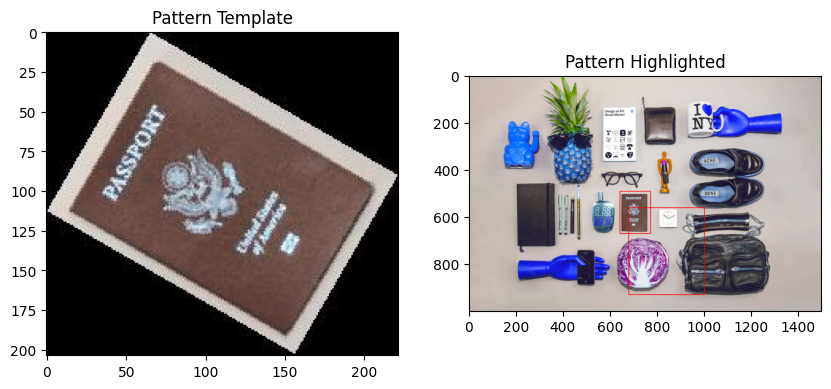

In [250]:
show(img1, img2, highlight_start, highlight_end, dataset.iloc[3])

In [251]:
iou(dataset.iloc[3], highlight_start, highlight_end)

0.07731841886478724